In [202]:
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')


In [203]:
def density(X1,X2):
    return np.exp(-(250.25*X1*X1-2*249.75*X1*X2+250.25*X2*X2))
    

# Metropolis-Hastings

In [204]:

# initial point 

x0, y0 = np.array([-1,1])

Listx , Listy = [x0], [y0]

# number of sample 
N = 100


for i in range(N):
    xn, yn = random.uniform(-1,1),random.uniform(-1,1)
    a = density(xn,yn)/density(x0,y0) 
    if a >=1:
        Listx = Listx +[xn]
        Listy = Listy +[yn]
        x0,y0 = xn, yn 
    else:
        if random.random()<a:
            Listx = Listx + [xn]
            Listy = Listy +[yn]
            x0,y0 = xn, yn
            


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


In [205]:
# the rate of the sample 

len(Listx)/100.0

0.14

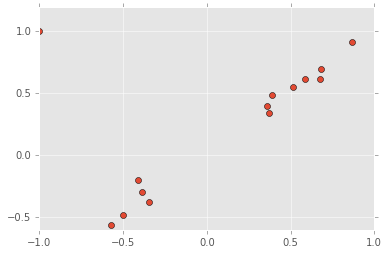

In [206]:
plt.plot(Listx, Listy,'o')

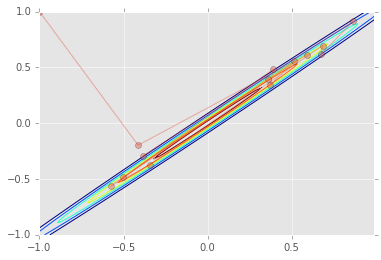

In [207]:
plt.figure()
plt.plot(Listx, Listy,'o-', alpha=0.4)
x = np.arange(-1, 1, 0.01)
y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(x, y)
plt.contour(X,Y,density(X,Y),)

# Hamiltonian Monte Carlo

In [191]:
def density(X1,X2,p1,p2):
    return np.exp(-(250.25*X1*X1-2*249.75*X1*X2+250.25*X2*X2)-p1*p1/2.0-p2*p2/2.0)

def gradE(x):
    return np.array([500.50*x[0]-2*249.75*x[1],-2*249.75*x[0]+500.50*x[1]])



    
# initial point 
x0 = np.array([-1,1])

Listx = [x0]

# number of samples 
N = 100
T = 100
epsilon = 0.056



for i in range(N): 
    p0 = np.random.normal(0,1,2)

    for t in range(T):
        ph = p0 - epsilon* gradE(x0)/2.0
        xn = x0 + epsilon* ph
        pn = ph - epsilon* gradE(xn)/2
    

    a = density(xn[0],xn[1],pn[0],pn[1])/density(x0[0],x0[1],p0[0],p0[1])

    if a >=1:
        Listx = Listx +[xn]
        x0,p0 = xn, pn 
    else:
        if random.random() < a:
            Listx = Listx + [xn]
            x0,p0 = xn, pn
            



/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


In [192]:
# the rate of sample 

len(Listx)/100.0

0.61

In [193]:
x11=[Listx[i][0] for i in range(len(Listx))]
x22=[Listx[i][1] for i in range(len(Listx))]

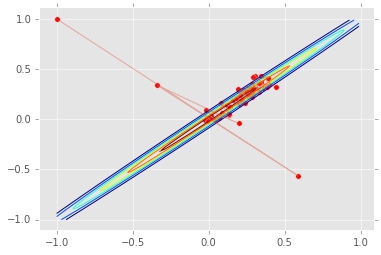

In [194]:
plt.figure()
plt.plot(x11,x22,'-',alpha=0.4)
plt.scatter(x11,x22,c='red', s=30)
x1 = np.arange(-1, 1, 0.01)
x2 = np.arange(-1, 1, 0.01)
X1, X2 = np.meshgrid(x1, x2)
plt.contour(X1,X2,np.exp(-(250.25*X1*X1-2*249.75*X1*X2+250.25*X2*X2)))